In [1]:
import pyodbc
pyodbc.drivers()
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
server = 'tcp:31.288.186.65,49170'
database = 'monitor' # enter database name
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=DELTA\MSSQLSERVER01;DATABASE=monitor;Trusted_Connection=yes;')
cursor = cnxn.cursor()

In [3]:
# select command
query = ''' SELECT * FROM environmentalData''';
data = pd.read_sql(query, cnxn)
# sensor1 = lightIntensity
# sensor2 = soilHumidity

In [4]:
data.head()

,id,time,sensor1,sensor2,sensor3,sensor4
0,167,Wed Jun 1 15:30:21 2022,362.0,176.0,0.0,0.0
1,168,Wed Jun 1 15:30:25 2022,213.0,145.0,0.0,0.0
2,169,Wed Jun 1 15:30:30 2022,214.0,148.0,0.0,0.0
3,170,Wed Jun 1 15:30:35 2022,196.0,120.0,0.0,0.0
4,171,Wed Jun 1 15:30:40 2022,196.0,118.0,0.0,0.0


In [5]:
data.tail()

,id,time,sensor1,sensor2,sensor3,sensor4
61,229,Wed Jun 1 15:35:35 2022,189.0,100.0,0.0,0.0
62,230,Wed Jun 1 15:35:40 2022,195.0,110.0,0.0,0.0
63,231,Wed Jun 1 15:35:45 2022,185.0,92.0,0.0,0.0
64,232,Wed Jun 1 15:35:50 2022,190.0,100.0,0.0,0.0
65,233,Wed Jun 1 15:35:55 2022,188.0,100.0,0.0,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       66 non-null     int64  
 1   time     66 non-null     object 
 2   sensor1  66 non-null     float64
 3   sensor2  66 non-null     float64
 4   sensor3  66 non-null     float64
 5   sensor4  66 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 3.2+ KB


In [7]:
data.dtypes

id           int64
time        object
sensor1    float64
sensor2    float64
sensor3    float64
sensor4    float64
dtype: object

In [8]:
data.shape

(66, 6)

In [9]:
data.count

<bound method DataFrame.count of      id                      time  sensor1  sensor2  sensor3  sensor4
0   167  Wed Jun  1 15:30:21 2022    362.0    176.0      0.0      0.0
1   168  Wed Jun  1 15:30:25 2022    213.0    145.0      0.0      0.0
2   169  Wed Jun  1 15:30:30 2022    214.0    148.0      0.0      0.0
3   170  Wed Jun  1 15:30:35 2022    196.0    120.0      0.0      0.0
4   171  Wed Jun  1 15:30:40 2022    196.0    118.0      0.0      0.0
..  ...                       ...      ...      ...      ...      ...
61  229  Wed Jun  1 15:35:35 2022    189.0    100.0      0.0      0.0
62  230  Wed Jun  1 15:35:40 2022    195.0    110.0      0.0      0.0
63  231  Wed Jun  1 15:35:45 2022    185.0     92.0      0.0      0.0
64  232  Wed Jun  1 15:35:50 2022    190.0    100.0      0.0      0.0
65  233  Wed Jun  1 15:35:55 2022    188.0    100.0      0.0      0.0

[66 rows x 6 columns]>

In [10]:
data.describe()

,id,sensor1,sensor2,sensor3,sensor4
count,66.000000,66.000000,66.000000,66.0,66.0
mean,199.636364,212.787879,138.712121,0.0,0.0
std,19.403914,23.918139,27.366889,0.0,0.0
min,167.000000,177.000000,66.000000,0.0,0.0
25%,183.250000,196.000000,111.000000,0.0,0.0
50%,199.500000,220.500000,155.000000,0.0,0.0
75%,215.750000,222.000000,159.000000,0.0,0.0
max,233.000000,362.000000,176.000000,0.0,0.0


In [11]:
print(data.isnull().sum())

id         0
time       0
sensor1    0
sensor2    0
sensor3    0
sensor4    0
dtype: int64


In [12]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
print(IQR)

id         32.5
sensor1    26.0
sensor2    48.0
sensor3     0.0
sensor4     0.0
dtype: float64


<AxesSubplot:xlabel='sensor1'>

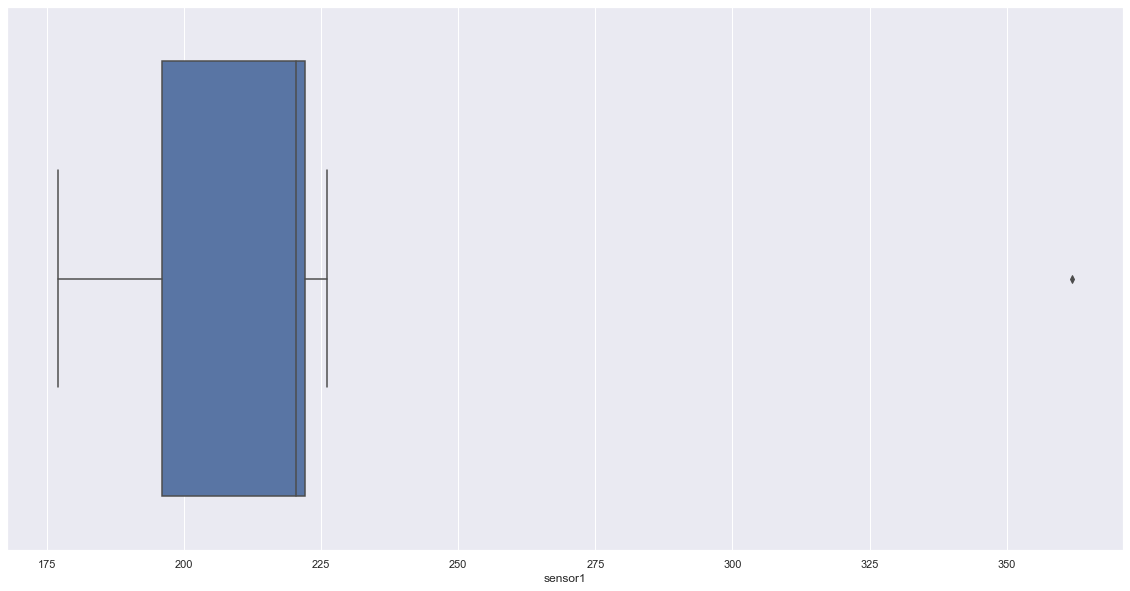

In [13]:
sns.set(color_codes=True)
plt.figure(figsize=(20,10))
sns.boxplot(x=data['sensor1'])

<AxesSubplot:xlabel='sensor2'>

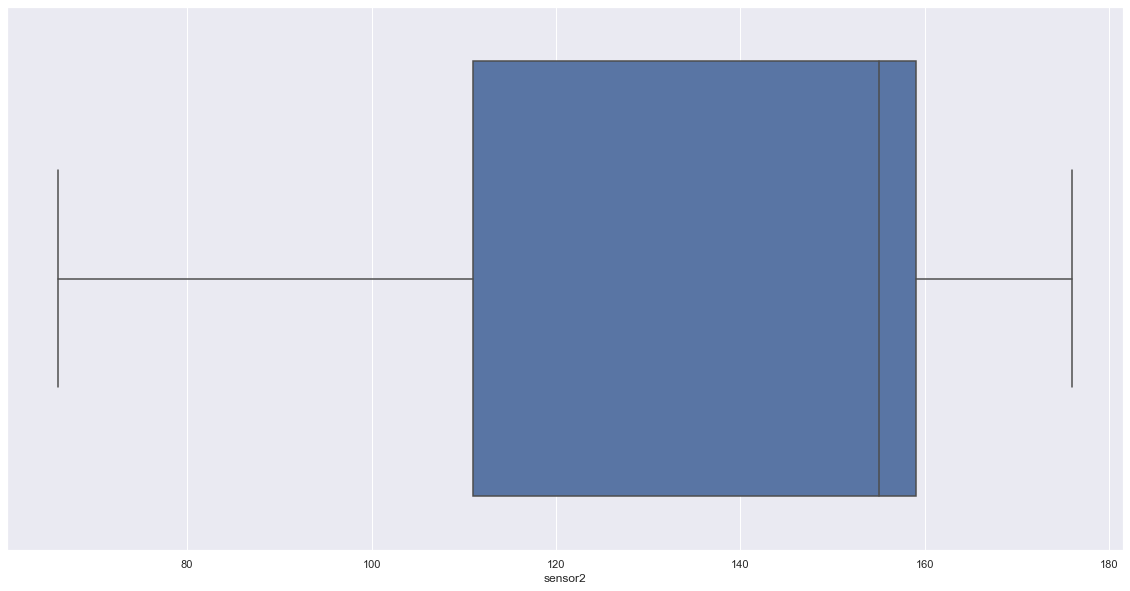

In [14]:
sns.set(color_codes=True)
plt.figure(figsize=(20,10))
sns.boxplot(x=data['sensor2'])

<BarContainer object of 66 artists>

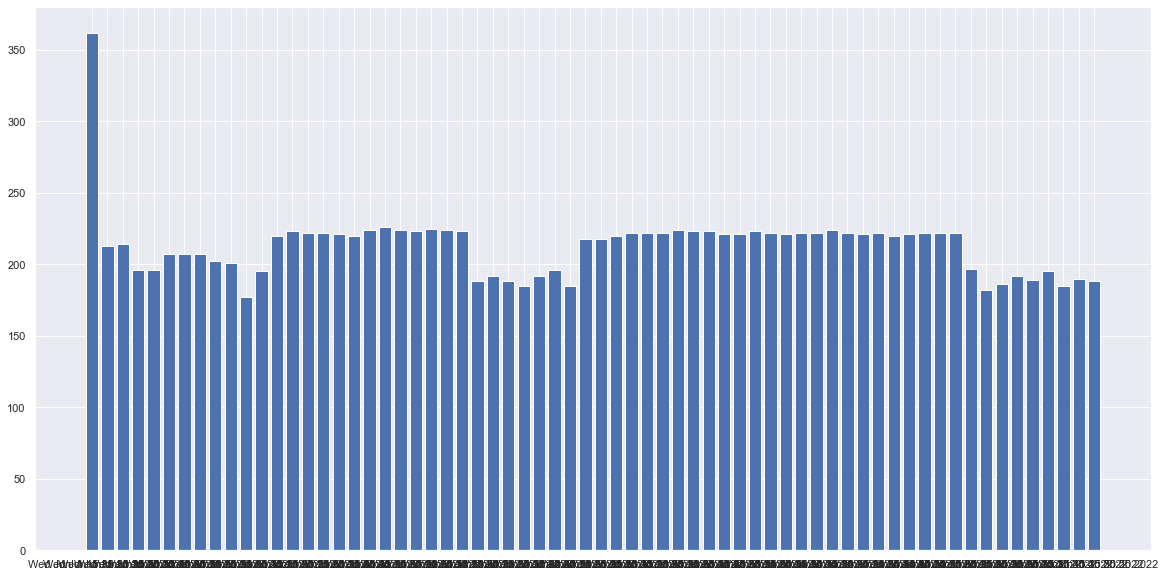

In [15]:
plt.figure(figsize=(20,10))
plt.bar(x=data['time'], height=data['sensor1'])

<BarContainer object of 66 artists>

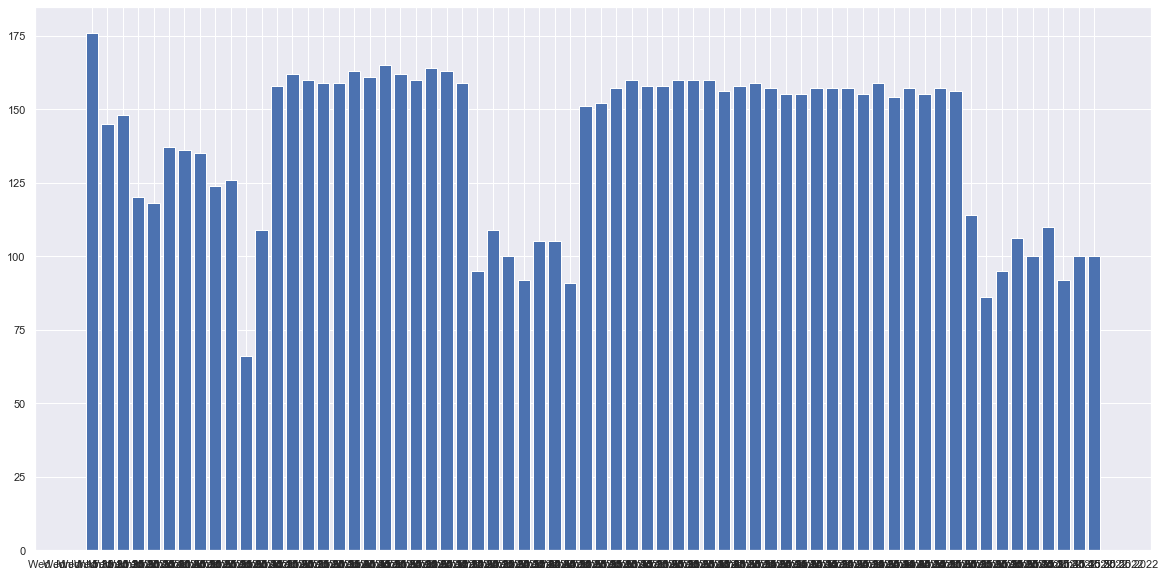

In [16]:
plt.figure(figsize=(20,10))
plt.bar(x=data['time'], height=data['sensor2'])

,id,sensor1,sensor2,sensor3,sensor4
id,1.00000,-0.214510,-0.156560,NaN,NaN
sensor1,-0.21451,1.000000,0.745721,NaN,NaN
sensor2,-0.15656,0.745721,1.000000,NaN,NaN
sensor3,NaN,NaN,NaN,NaN,NaN
sensor4,NaN,NaN,NaN,NaN,NaN


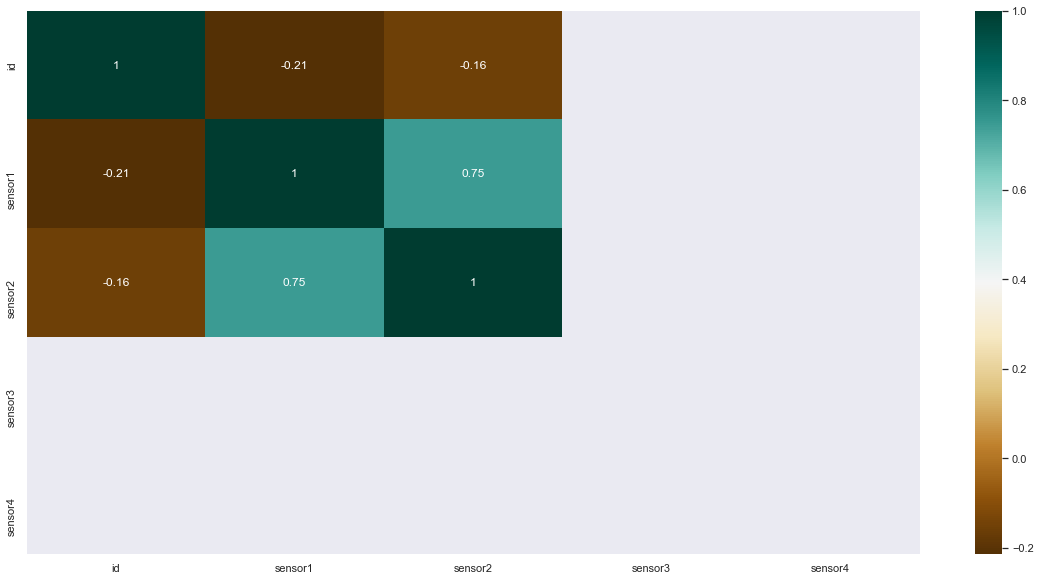

In [17]:
plt.figure(figsize=(20,10))
heatmapChart=data.corr()
sns.heatmap(heatmapChart, cmap="BrBG", annot=True)
heatmapChart

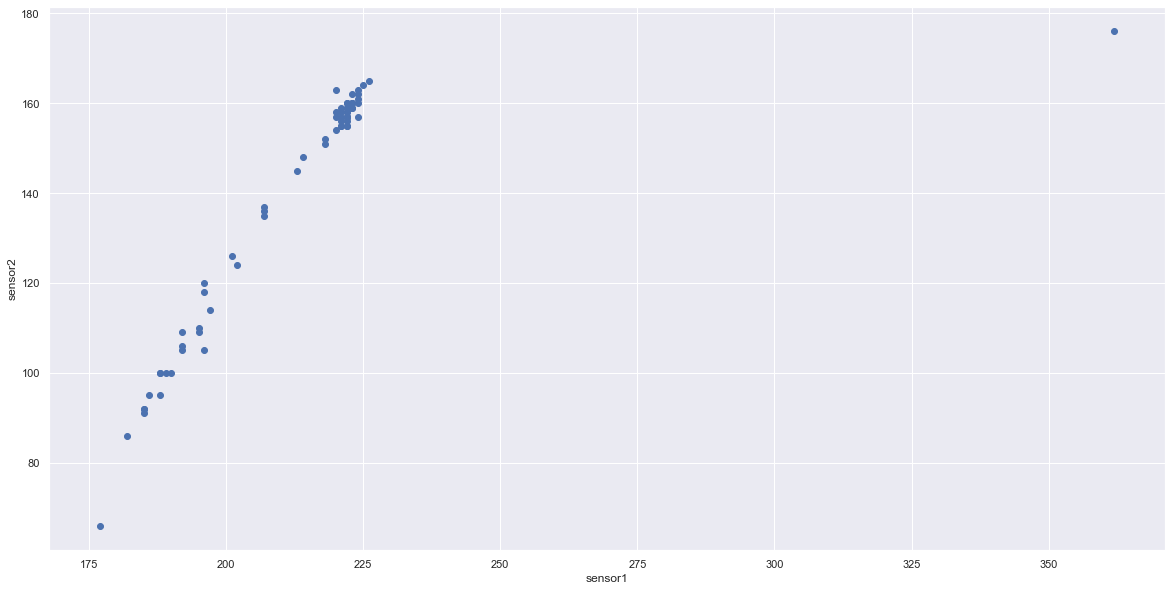

In [18]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(data['sensor1'], data['sensor2'])
ax.set_xlabel('sensor1')
ax.set_ylabel('sensor2')
plt.show()

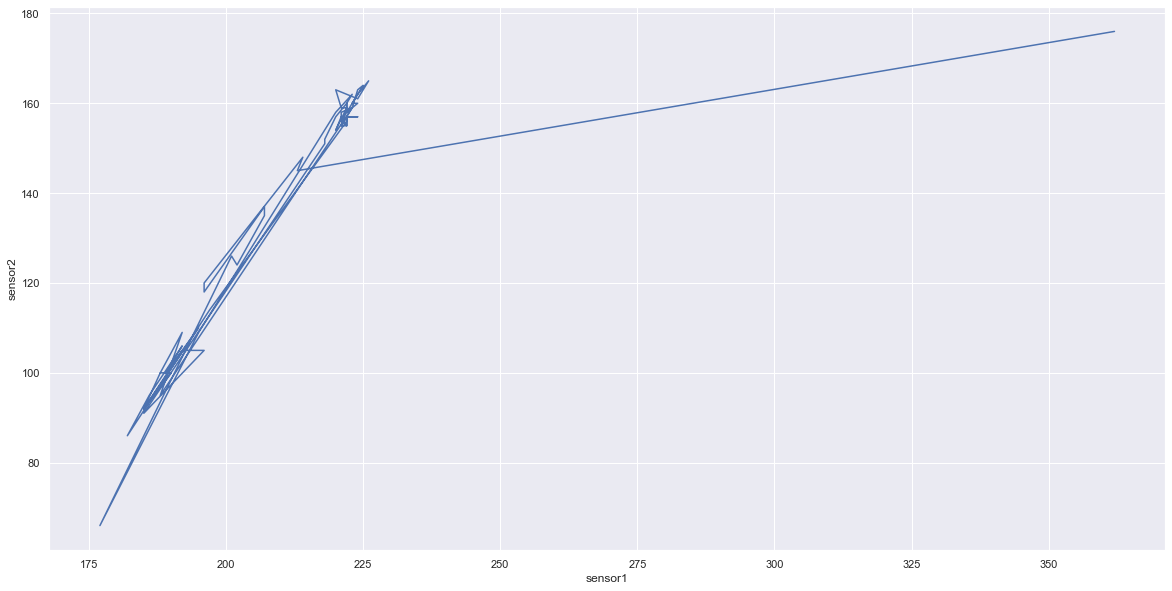

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(data["sensor1"], data["sensor2"])
ax.set_xlabel('sensor1')
ax.set_ylabel('sensor2')
plt.show()

In [20]:
data.drop(["id","sensor3","sensor4"], axis="columns", inplace=True)
data

,time,sensor1,sensor2
0,Wed Jun 1 15:30:21 2022,362.0,176.0
1,Wed Jun 1 15:30:25 2022,213.0,145.0
2,Wed Jun 1 15:30:30 2022,214.0,148.0
3,Wed Jun 1 15:30:35 2022,196.0,120.0
4,Wed Jun 1 15:30:40 2022,196.0,118.0
...,...,...,...
61,Wed Jun 1 15:35:35 2022,189.0,100.0
62,Wed Jun 1 15:35:40 2022,195.0,110.0
63,Wed Jun 1 15:35:45 2022,185.0,92.0
64,Wed Jun 1 15:35:50 2022,190.0,100.0


In [21]:
data["sensor1"] = ((data["sensor1"])/2)
data["sensor2"] = ((data["sensor2"])/2)
conditions = [data['sensor1'] > 100, 
              data['sensor2'] > 50]
choices = ['DISASTER', 'NO DISASTER']
data['currentTendency'] = np.select(conditions, choices, default='UNDEFINED')
data.head()

,time,sensor1,sensor2,currentTendency
0,Wed Jun 1 15:30:21 2022,181.0,88.0,DISASTER
1,Wed Jun 1 15:30:25 2022,106.5,72.5,DISASTER
2,Wed Jun 1 15:30:30 2022,107.0,74.0,DISASTER
3,Wed Jun 1 15:30:35 2022,98.0,60.0,NO DISASTER
4,Wed Jun 1 15:30:40 2022,98.0,59.0,NO DISASTER


In [22]:
x = data[["sensor1","sensor2"]]
y = data["currentTendency"]

In [23]:
print(x)

    sensor1  sensor2
0     181.0     88.0
1     106.5     72.5
2     107.0     74.0
3      98.0     60.0
4      98.0     59.0
..      ...      ...
61     94.5     50.0
62     97.5     55.0
63     92.5     46.0
64     95.0     50.0
65     94.0     50.0

[66 rows x 2 columns]


In [24]:
print(y)

0        DISASTER
1        DISASTER
2        DISASTER
3     NO DISASTER
4     NO DISASTER
         ...     
61      UNDEFINED
62    NO DISASTER
63      UNDEFINED
64      UNDEFINED
65      UNDEFINED
Name: currentTendency, Length: 66, dtype: object


In [25]:
x = np.array(x)
y = np.array(y)

In [26]:
#TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=None)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [28]:
LIR = LinearRegression()
LOR = LogisticRegression()
RFR = RandomForestRegressor()
KNN = KNeighborsClassifier(n_neighbors=3)
DTC = DecisionTreeClassifier()
SVM = SVC()

In [29]:
# NOW WE WILL TRAIN OUR MODELS
LOtrain = LOR.fit(x_train, y_train)
Ktrain = KNN.fit(x_train, y_train)
Dtrain = DTC.fit(x_train, y_train)
Strain = SVM.fit(x_train, y_train)

In [30]:
LOaccuracy = LOR.score(x_train, y_train)
print("The Train Accuracy Percentage Is As Follows: \n",((LOaccuracy)*100),"\n")

The Train Accuracy Percentage Is As Follows: 
 100.0 



In [31]:
Kaccuracy = KNN.score(x_train, y_train)
print("The Train Accuracy Percentage Is As Follows: \n",((Kaccuracy)*100),"\n")

The Train Accuracy Percentage Is As Follows: 
 100.0 



In [32]:
Daccuracy = DTC.score(x_train, y_train)
print("The Train Accuracy Percentage Is As Follows: \n",((Daccuracy)*100),"\n")

The Train Accuracy Percentage Is As Follows: 
 100.0 



In [33]:
Saccuracy = SVM.score(x_train, y_train)
print("The Train Accuracy Percentage Is As Follows: \n",((Saccuracy)*100),"\n")

The Train Accuracy Percentage Is As Follows: 
 94.23076923076923 



In [34]:
LOtest = LOtrain.predict(x_test)
Ktest = Ktrain.predict(x_test)
Dtest = Dtrain.predict(x_test)
Stest = Strain.predict(x_test)

In [35]:
#PERFORMANCE CHECKING USING CONFUSION MATRIX
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [36]:
LOaccuracy1 = LOR.score(x_test, y_test)
print("The Actual Accuracy Percentage Is As Follows: \n",((LOaccuracy1)*100),"\n")
print("The Predicted Values Are As Follows: \n",(LOtest),"\n")
print("The Confusion Matrix Is As Follows: \n",confusion_matrix(LOtest, y_test),"\n")

The Actual Accuracy Percentage Is As Follows: 
 100.0 

The Predicted Values Are As Follows: 
 ['DISASTER' 'DISASTER' 'UNDEFINED' 'DISASTER' 'UNDEFINED' 'DISASTER'
 'NO DISASTER' 'DISASTER' 'NO DISASTER' 'DISASTER' 'UNDEFINED' 'DISASTER'
 'DISASTER' 'NO DISASTER'] 

The Confusion Matrix Is As Follows: 
 [[8 0 0]
 [0 3 0]
 [0 0 3]] 



In [37]:
Kaccuracy1 = KNN.score(x_test, y_test)
print("The Actual Accuracy Percentage Is As Follows: \n",((Kaccuracy1)*100),"\n")
print("The Predicted Values Are As Follows: \n",(Ktest),"\n")
print("The Confusion Matrix Is As Follows: \n",confusion_matrix(Ktest, y_test),"\n")

The Actual Accuracy Percentage Is As Follows: 
 100.0 

The Predicted Values Are As Follows: 
 ['DISASTER' 'DISASTER' 'UNDEFINED' 'DISASTER' 'UNDEFINED' 'DISASTER'
 'NO DISASTER' 'DISASTER' 'NO DISASTER' 'DISASTER' 'UNDEFINED' 'DISASTER'
 'DISASTER' 'NO DISASTER'] 

The Confusion Matrix Is As Follows: 
 [[8 0 0]
 [0 3 0]
 [0 0 3]] 



In [38]:
Saccuracy1 = SVM.score(x_test, y_test)
print("The Actual Accuracy Percentage Is As Follows: \n",((Saccuracy1)*100),"\n")
print("The Predicted Values Are As Follows: \n",(Stest),"\n")
print("The Confusion Matrix Is As Follows: \n",confusion_matrix(Stest, y_test),"\n")

The Actual Accuracy Percentage Is As Follows: 
 85.71428571428571 

The Predicted Values Are As Follows: 
 ['DISASTER' 'DISASTER' 'UNDEFINED' 'DISASTER' 'UNDEFINED' 'DISASTER'
 'UNDEFINED' 'DISASTER' 'UNDEFINED' 'DISASTER' 'UNDEFINED' 'DISASTER'
 'DISASTER' 'NO DISASTER'] 

The Confusion Matrix Is As Follows: 
 [[8 0 0]
 [0 1 0]
 [0 2 3]] 



In [39]:
Daccuracy1 = DTC.score(x_test, y_test)
print("The Actual Accuracy Percentage Is As Follows: \n",((Daccuracy1)*100),"\n")
print("The Predicted Values Are As Follows: \n",(Dtest),"\n")
print("The Confusion Matrix Is As Follows: \n",confusion_matrix(Dtest, y_test),"\n")

The Actual Accuracy Percentage Is As Follows: 
 100.0 

The Predicted Values Are As Follows: 
 ['DISASTER' 'DISASTER' 'UNDEFINED' 'DISASTER' 'UNDEFINED' 'DISASTER'
 'NO DISASTER' 'DISASTER' 'NO DISASTER' 'DISASTER' 'UNDEFINED' 'DISASTER'
 'DISASTER' 'NO DISASTER'] 

The Confusion Matrix Is As Follows: 
 [[8 0 0]
 [0 3 0]
 [0 0 3]] 



In [40]:
data['predictedTendency'] = pd.Series(Dtest)
data

,time,sensor1,sensor2,currentTendency,predictedTendency
0,Wed Jun 1 15:30:21 2022,181.0,88.0,DISASTER,DISASTER
1,Wed Jun 1 15:30:25 2022,106.5,72.5,DISASTER,DISASTER
2,Wed Jun 1 15:30:30 2022,107.0,74.0,DISASTER,UNDEFINED
3,Wed Jun 1 15:30:35 2022,98.0,60.0,NO DISASTER,DISASTER
4,Wed Jun 1 15:30:40 2022,98.0,59.0,NO DISASTER,UNDEFINED
...,...,...,...,...,...
61,Wed Jun 1 15:35:35 2022,94.5,50.0,UNDEFINED,NaN
62,Wed Jun 1 15:35:40 2022,97.5,55.0,NO DISASTER,NaN
63,Wed Jun 1 15:35:45 2022,92.5,46.0,UNDEFINED,NaN
64,Wed Jun 1 15:35:50 2022,95.0,50.0,UNDEFINED,NaN


In [41]:
import anvil.server
from anvil.tables import app_tables
anvil.server.connect("FLI3Y75UB765HODRCBRJGR76-S7AC6ZKYCFUSQZUH")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


In [ ]:
for i, row in data.iterrows():
    #while i<len(data)
    app_tables.monitor.add_row(time=row['time'],
                               sensor1=row['sensor1'],
                               sensor2=row['sensor2'],
                               currentTendency=row['currentTendency'],
                               predictedTendency=row['predictedTendency'])